In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veri seti yükleme
df = pd.read_csv("diabetes.csv")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

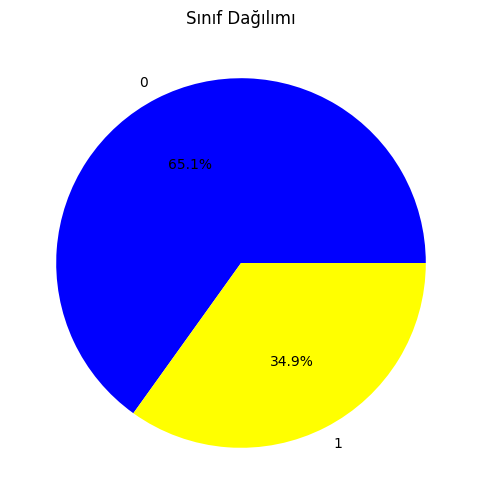

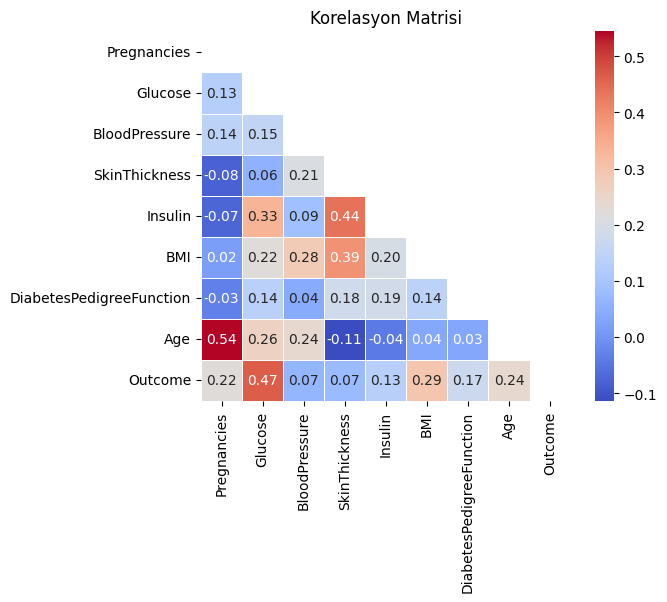

In [2]:
# Veri Setini inceleme
print(df.head())
print(df.info())
print(df.describe())

# Pie Chart Oluşturma
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'])
plt.title("Sınıf Dağılımı")
plt.ylabel('')
plt.show()

# Korelasyon matrisi
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, fmt=".2f", annot_kws={"size": 10}, linewidths=0.5, square=True)
plt.title("Korelasyon Matrisi")
plt.show()

In [3]:
# Outcome sütununu ayırma
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train test split işlemleri
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

# Ensemble sınıflandırma algoritmaları
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
ab_clf = AdaBoostClassifier(random_state=42)

# Ensemble sınıflandırma algoritmalarının hiperparametreleri
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}


In [4]:
# GridSearchCV ile en iyi parametre kombinasyonları
rf_gridSearch = GridSearchCV(estimator=rf_clf, param_grid=rf_params, cv=5)
gb_gridSearch = GridSearchCV(estimator=gb_clf, param_grid=gb_params, cv=5)
ab_gridSearch = GridSearchCV(estimator=ab_clf, param_grid=ab_params, cv=5)

# Model eğitme ve en iyi algoritmaları alıyoruz
rf_gridSearch.fit(x_train, y_train)
best_rf_clf = rf_gridSearch.best_estimator_

gb_gridSearch.fit(x_train, y_train)
best_gb_clf = gb_gridSearch.best_estimator_

ab_gridSearch.fit(x_train, y_train)
best_ab_clf = ab_gridSearch.best_estimator_

# Model doğruluğu
acc_rf = accuracy_score(y_test, best_rf_clf.predict(x_test))
acc_gb = accuracy_score(y_test, best_gb_clf.predict(x_test))
acc_ab = accuracy_score(y_test, best_ab_clf.predict(x_test))

# En iyi parametreler
best_rf_params = best_rf_clf.get_params()
best_gb_params = best_gb_clf.get_params()
best_ab_params = best_ab_clf.get_params()

Random Forest Doğruluğu: 0.75
Random Forest En İyi Parametreler: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Gradient Boosting Doğruluğu: 0.7447916666666666
Gradient Boosting En İyi Parametreler: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


AdaBoost Doğr

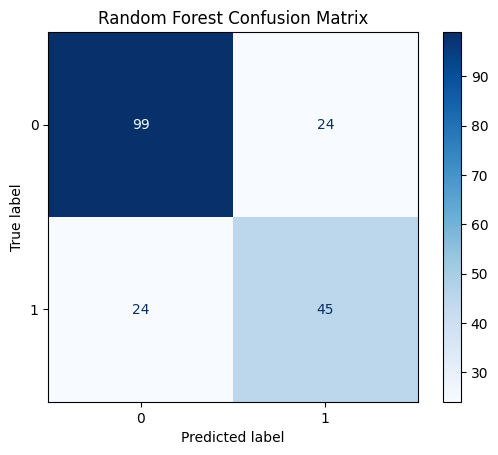

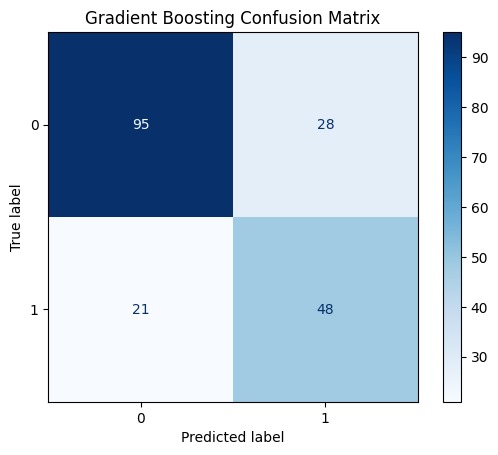

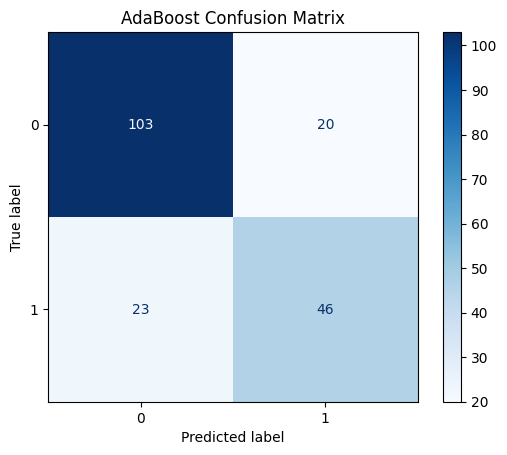

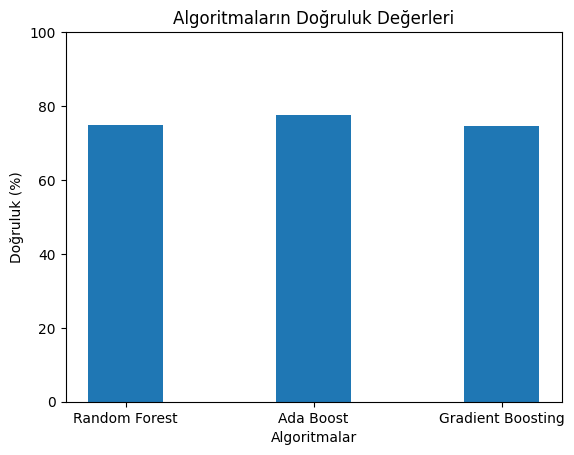

In [5]:
# Sonuçları ekrana yazdırma
print("Random Forest Doğruluğu:", acc_rf)
print("Random Forest En İyi Parametreler:", best_rf_params)
print("\n")

print("Gradient Boosting Doğruluğu:", acc_gb)
print("Gradient Boosting En İyi Parametreler:", best_gb_params)
print("\n")

print("AdaBoost Doğruluğu:", acc_ab)
print("AdaBoost En İyi Parametreler:", best_ab_params)
print("\n")

# Confusion matrix her algoritma için
cm_rf = confusion_matrix(y_test, best_rf_clf.predict(x_test))
cm_gb = confusion_matrix(y_test, best_gb_clf.predict(x_test))
cm_ab = confusion_matrix(y_test, best_ab_clf.predict(x_test))

# Confusion matrix görselleştirme için fonksiyon oluşturma
def confusionMatrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title(title)
    plt.show()

# Confusion matrix çizimi
confusionMatrix(cm_rf, "Random Forest Confusion Matrix")
confusionMatrix(cm_gb, "Gradient Boosting Confusion Matrix")
confusionMatrix(cm_ab, "AdaBoost Confusion Matrix")

algorithms = ["Random Forest", "Ada Boost", "Gradient Boosting"]
ac = [acc_rf, acc_ab, acc_gb]

#Grafikte daha okunabilir değerler olamsı için değerler çarpılır
ac = [value * 100 for value in ac]

# Bar grafiği 
plt.bar(algorithms, ac, width = 0.4)
plt.xlabel('Algoritmalar')
plt.ylabel('Doğruluk (%)')
plt.title('Algoritmaların Doğruluk Değerleri')
plt.ylim(0, 100) 
plt.show()